# Machine Learning Classifiers using Scikit-Learn

## Machine Learning Steps
- recall from introduction:
![Overview of ML systems](./images/01_09.png)

## Scikit-Learn

- scikit-learn library provides varietes of classification and regression algorithms
- provides user-friendly and consistent interface for using those algorithms efficiently and productively
- popular in academia as well as in industry
- for more info see [https://scikit-learn.org/](https://scikit-learn.org/stable/)

### Choosing a classification algorithm

- choosing appropriate algorithm for a particular problem requires practice and experience
    - each algorithm has its own quirks nd is based on certain assumptions
- **No free lunch theorem** by David H. Wolpert
    - no single classifier works best across all possible scenarios
- it is always recommended that you compare the performance of at least a handful of different learning algorithms to select the best model for the particular problem

## First steps with scikit-learn

### load data

- loading the Iris dataset from scikit-learn
- the third column represents the petal length, and the fourth column the petal width of the flower examples
- the classes are already converted to integer labels where:
    - 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica
- [https://archive.ics.uci.edu/ml/datasets/iris])https://archive.ics.uci.edu/ml/datasets/iris)
- sklearn.datasets.load_iris API - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.display import Image
%matplotlib inline

In [3]:
iris = datasets.load_iris()

In [4]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [5]:
# dataset is a data Bunch type in scikit learn
type(iris)

sklearn.utils.Bunch

In [6]:
# the data itself is numpy's ndarray
type(iris.data)

numpy.ndarray

In [7]:
# list all the attributes of iris Bunch object
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
dir(iris.data)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

In [12]:
# just use petal-length and petal width features
# X and y are conventions used to represet X as a matrix of features and y as a vector of labels
X = iris.data
y = iris.target

In [13]:
# print the list of unique labels
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [14]:
# let's look at the first 10 rows of data
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

## Splitting data into training and test set
- test set or also called validation data set needs to be set aside to evaluate model
    - gives some metric on how well the model will likely to perform if deployed on unseen real-world data
- typical split is 80/20 or 75/25 - 80% or 75% training and 20% or 25% test data
    - rule of thumb: if you've fewer data, use 80/20 
    - if you've larger data set, use 75/25 or 70/30 or 60/40

```python
sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
```

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- use random seed to reproduce the same random numbers
- use stratification; means the training and test subset splits have the same proportions of class labels as the input dataset

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)

In [16]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [40 40 40]
Labels counts in y_test: [10 10 10]


## Standardizing the features
- scale the feature values using StandardScaler
- estimate sample mean and standard deviation and use those parameters to scale both the training and test samples
- [https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
    - for each sample: $\vec{x} = \frac{(\vec{x}-u)}{s}$ where $u$ = mean and $s$ = standard deviation 
- More on feature scaling in Feature Engineering Chapter

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X) # fit the whole data to calculate mean and standard deviation
X_train = sc.transform(X_train) # transform training set
X_test = sc.transform(X_test) # transform validation set

## Selecting a classifier

### Training a Perceptron classifier
- perceptron is one of the earliest machine learning algorithms that models human brain neurons

### Artificial neurons - an early history
- in order to design AI, the first concept of a simplified brain cell called **McCulloch-Pitts (MCP)** neuron in 1943
    - named after the scientists
- Neurons are interconnected nerve cells in the brain that are involved in the processing and transmitting of chemical and electrical signals
![Image](./images/02_01.png)
- nerve cell is a simple logic gate with binary outputs
- multiple signals arrive at the dendrites, then integrated into the cell body, and, if the accumulated signal exceeds a certain threshold, an output signal is generated that will be passed on by the axon
- in 1957, Frank Rosenblatt published the first concept of the perceptron learning rule based on the MCP neuron model
- the proposed algorithm is a rule that would automatically learn the optimal weight coefficients that would then be multiplied with the input features in order to make a decision of whether a neuron fires (transmits a signal) or not
- in supervised learning and binary classification problem, such an algorithm could then be used to predict whether a new data point belongs to one class or the other
- we'll use the Perceptron and a few other classification algorithms implemented in scikit-learn library
- most algorithms in scikit-learn already support multiclass classification by default using **one-vs.-rest (OvR)** method
    - allowing us to feed all samples with 3 different classes/labels to the perceptron algorithm

In [18]:
from sklearn.linear_model import Perceptron

# eta0 - learning rate
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train, y_train)

Perceptron(eta0=0.1, random_state=1)

**Note**

- You can replace `Perceptron(n_iter, ...)` by `Perceptron(max_iter, ...)` in scikit-learn >= 0.19. 
- The `n_iter` parameter is used here deliberately, because some people still use scikit-learn 0.18.

In [19]:
y_pred = ppn.predict(X_test)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 5


## Evaluating the classifier
- there are various metrics to evalute the performance of a model
- for classification problems, accuracy, confusion matrix, precision, recall, and F1 score are commonly used

### Accuracy (ACC)
- accuracy is defined as the percentage of samples correctly classified
- works well on balanced dataset - each class has same number of samples

- $accuracy = \frac{TP+TN}{P+N}$ 

### Confusion Matrix

- https://glassboxmedicine.com/2019/02/17/measuring-performance-the-confusion-matrix/
https://en.wikipedia.org/wiki/Confusion_matrix
![Confusion Matrix](./images/confusion-matrix.png)


#### True Positives (TPs)
- the number of positive samples that the model correctly classified as positive
    
#### True Negatives (TNs)
- the number of negative samples that the model correctly classified as negative

#### False Positives (FPs)
- the number of negative samples that the model incorrectly classified as positive (i.e. the negative samples that were falsely classified as "positive")

#### False Negatives (FNs)
- the number of positive examples that the model incorrectly classified as negative (i.e. the positive examples that were falsely classified as "negative")

#### Precision or Positive Prective Value
- $ precision = \frac{TP}{TP+FP}$

#### Recall or Sensitivity or True Positive Rate (TPR)
- $ recall = \frac{TP}{P}$

#### F1-score
- harmonic mean of precision and recall
- $f_1 = \frac{2TP}{2TP+FP+FN}$

In [20]:
# let's look at the accuracy score first
from sklearn.metrics import accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.833


In [22]:
# each classifier object also has score method that can be used to calcualte the accuracy
print('Accuracy: %.3f' % ppn.score(X_test, y_test))

Accuracy: 0.833


In [23]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
# not very informative

[[10  0  0]
 [ 2  5  3]
 [ 0  0 10]]


In [24]:
# let's plot the confustion matrix
from sklearn.metrics import plot_confusion_matrix

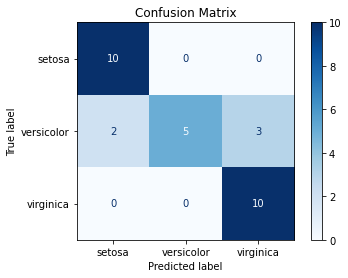

In [26]:
fig = plot_confusion_matrix(ppn, X_test, y_test,
                            display_labels=iris.target_names,
                            cmap=plt.cm.Blues,
                           )
fig.ax_.set_title("Confusion Matrix")
plt.show()

In [27]:
# calculate and print the other metrics with classification_report function
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.50      0.67        10
           2       0.77      1.00      0.87        10

    accuracy                           0.83        30
   macro avg       0.87      0.83      0.82        30
weighted avg       0.87      0.83      0.82        30



# Decision tree classifier
- decision tree a supervised learning method
- model is easier to visualize and understand
- tree is composed of nodes and those nodes are chosen looking for the optimum split of the features
    - two criteria are used: `gini` and `entropy`
- see  https://quantdare.com/decision-trees-gini-vs-entropy/ for the differnce between `gini` and `entropy`

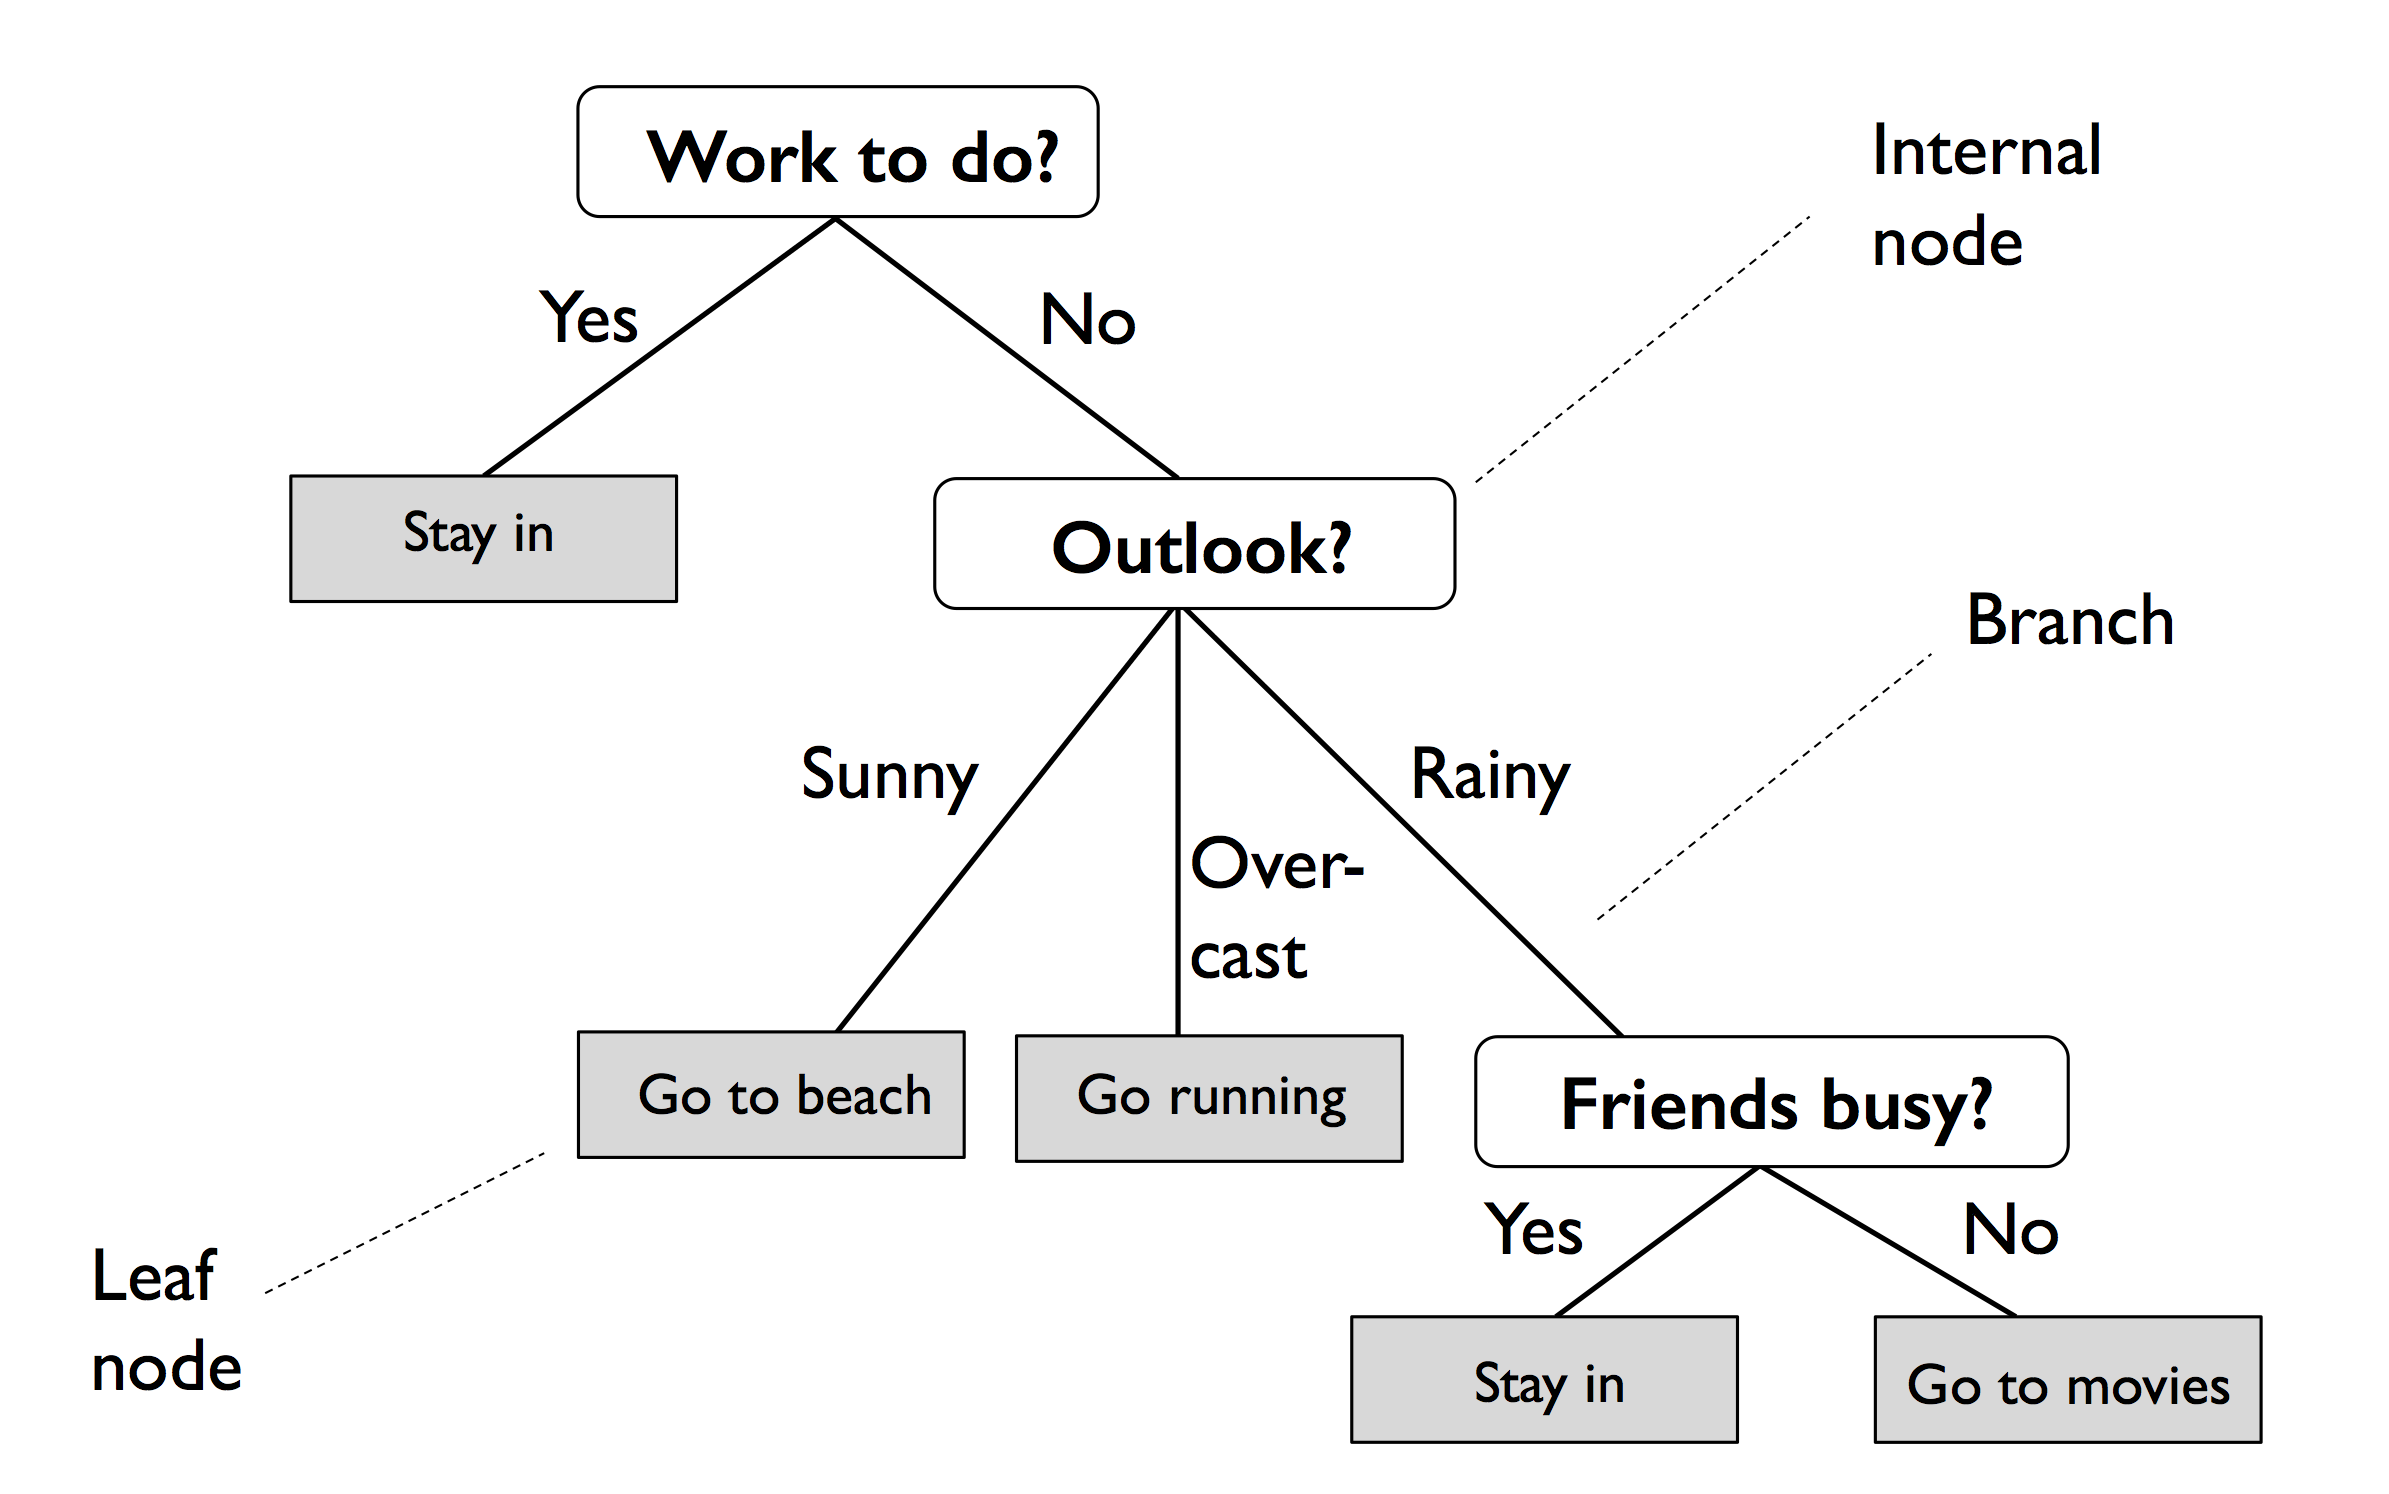

In [30]:
Image(filename='images/03_17.png', width=500) 

## Building a decision tree model

In [31]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    random_state=1)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

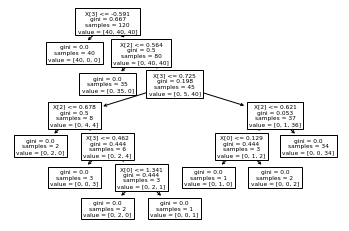

In [32]:
from sklearn import tree

tree.plot_tree(tree_model)
#plt.savefig('images/03_21_1.pdf')
plt.show()

## Better visualization with graphviz
- install graphviz binary and Python API library
- install Graphviz on the system
- see system specific answer - https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

In [33]:
! pip install graphviz

In [34]:
import graphviz
dot_data = tree.export_graphviz(tree_model, out_file=None, 
                              feature_names=iris.feature_names,
                              class_names=iris.target_names,
                              filled=True, rounded=True, special_characters=True)

In [35]:
graph = graphviz.Source(dot_data)

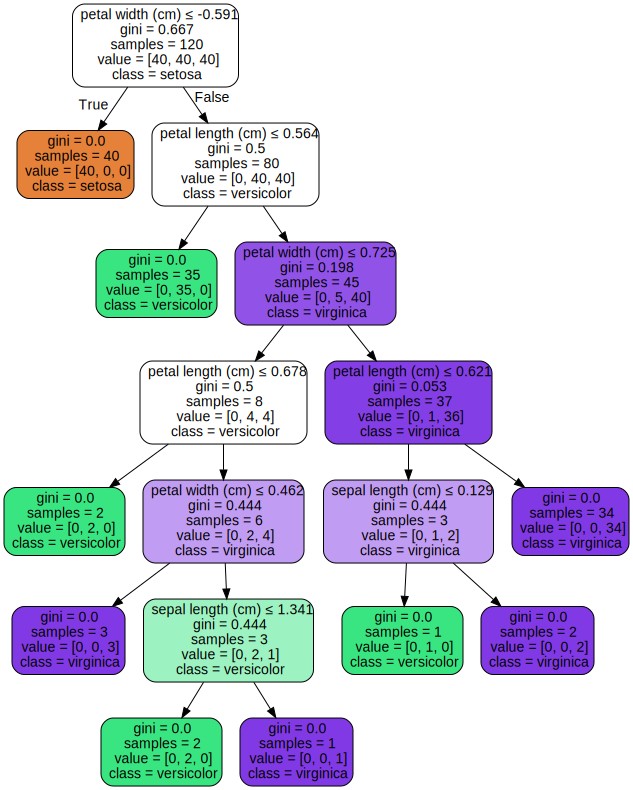

In [36]:
graph

In [40]:
y_pred = tree_model.predict(X_test)
# how many samples are correctly classified?
print('Correctly classified samples: %d' % (y_test == y_pred).sum())

Misclassified examples: 29


In [42]:
# how many samples are misclassified?
print(f'Misclassified samples: {(y_test != y_pred).sum()}')

Misclassified samples 1


In [38]:
# what is the accuracty
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.967


In [45]:
# correctly classified samples/ total number of samples
print(f'accuracy = {29/30:.3f}')

accuracy = 0.967


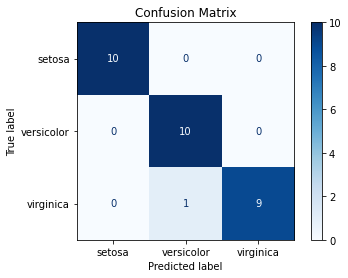

In [46]:
# plot the confusion matrix
fig = plot_confusion_matrix(tree_model, X_test, y_test,
                            display_labels=iris.target_names,
                            cmap=plt.cm.Blues,
                           )
fig.ax_.set_title("Confusion Matrix")
plt.show()

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## Random Forest (RF) Classifier
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- a ensemble-based meta classifier that fits a number of decision tree classifiers on various sub-samples of the dataset
- let's apply RF classifier to the IRIS dataset

In [52]:
# import the classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

In [53]:
RF = RandomForestClassifier() # use all default values

In [54]:
RF.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
y_pred = RF.predict(X_test)

In [56]:
print(f'Accuracy = {accuracy_score(y_test, y_pred):.3f}')

Accuracy = 0.967


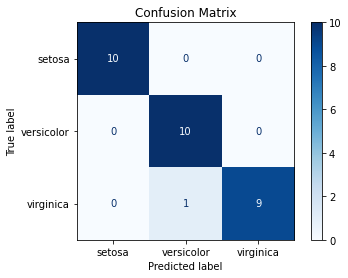

In [58]:
# plot the confusion matrix
fig = plot_confusion_matrix(RF, X_test, y_test,
                            display_labels=iris.target_names,
                            cmap=plt.cm.Blues,
                           )
fig.ax_.set_title("Confusion Matrix")
plt.show()

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

